In [3]:
import os
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [5]:
os.getcwd()

'C:\\Users\\91868\\Hari krishna\\Cluster analysis'

In [6]:
os.chdir('C:\\Users\\91868\\Desktop\\Hari Data science\\C7-20200526T134159Z-001\\C7\\Statistics\\Topic 19 - Factor Analysis and PCA')

In [7]:
data= pd.read_csv("bfi_data.csv")

In [9]:
data.shape

(2800, 28)

In [8]:
data.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 28 columns):
A1           2784 non-null float64
A2           2773 non-null float64
A3           2774 non-null float64
A4           2781 non-null float64
A5           2784 non-null float64
C1           2779 non-null float64
C2           2776 non-null float64
C3           2780 non-null float64
C4           2774 non-null float64
C5           2784 non-null float64
E1           2777 non-null float64
E2           2784 non-null float64
E3           2775 non-null float64
E4           2791 non-null float64
E5           2779 non-null float64
N1           2778 non-null float64
N2           2779 non-null float64
N3           2789 non-null float64
N4           2764 non-null float64
N5           2771 non-null float64
O1           2778 non-null float64
O2           2800 non-null int64
O3           2772 non-null float64
O4           2786 non-null float64
O5           2780 non-null float64
gender       2800 no

In [13]:
data.drop(['education'],axis=1,inplace=True)

In [14]:
data.dropna(inplace=True)

In [66]:
cols = data.columns

In [71]:
## It checks whether or not the observed variables intercorrelate at all using observed correlation against identity matrix. 

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value

(18837.7052560431, 0.0)

In [19]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data)

In [20]:
kmo_all

array([0.76701429, 0.84623134, 0.87043978, 0.86742059, 0.89790228,
       0.83853053, 0.79029767, 0.85316778, 0.83047923, 0.86397885,
       0.84158226, 0.88075767, 0.89441255, 0.870642  , 0.89196514,
       0.77421647, 0.77968541, 0.86082136, 0.87668629, 0.84783521,
       0.85740794, 0.77305764, 0.84480025, 0.77178465, 0.76654684,
       0.70615524, 0.669618  ])

In [21]:
kmo_model

0.8432658664109065

In [23]:
fa = FactorAnalyzer( rotation=None)
fa.fit(data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation=None, rotation_kwargs={},
               use_smc=True)

In [24]:
ev, v = fa.get_eigenvalues()

In [25]:
ev

array([5.17573425, 2.79803508, 2.16440386, 1.91319399, 1.60005591,
       1.19103861, 0.99074272, 0.83825172, 0.82066909, 0.75064349,
       0.70964401, 0.68002781, 0.6708173 , 0.6515725 , 0.62276835,
       0.58930468, 0.55290964, 0.53063096, 0.51327043, 0.493782  ,
       0.48000508, 0.43373299, 0.42157802, 0.39852221, 0.38273296,
       0.36741185, 0.2585205 ])

In [26]:
v

array([ 4.55355918e+00,  2.23880254e+00,  1.47836393e+00,  1.13578332e+00,
        8.71287294e-01,  4.38160024e-01,  1.99126000e-01,  1.17827540e-01,
        8.42102133e-02,  3.99187895e-02, -6.74810216e-04, -1.51650126e-02,
       -6.19208723e-02, -7.21947904e-02, -1.04007508e-01, -1.24273517e-01,
       -1.37448146e-01, -1.59514691e-01, -1.86061572e-01, -2.03401542e-01,
       -2.10241863e-01, -2.29047956e-01, -2.43711353e-01, -2.52062307e-01,
       -2.72384537e-01, -2.90656547e-01, -3.23547227e-01])

In [34]:
fa.get_factor_variance()

(array([4.55355895, 2.23880212, 1.47836351]),
 array([0.16865033, 0.0829186 , 0.0547542 ]),
 array([0.16865033, 0.25156893, 0.30632313]))

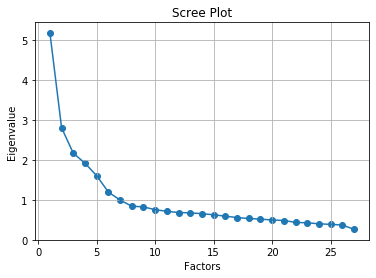

In [33]:
plt.scatter(range(1,data.shape[1]+1),ev)
plt.plot(range(1,data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [41]:
fa = FactorAnalyzer(n_factors=5,rotation=None)
fa.fit(data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=5, rotation=None, rotation_kwargs={},
               use_smc=True)

In [42]:
fa.get_factor_variance()

(array([4.63482621, 2.30477234, 1.55716411, 1.27535755, 0.98514603]),
 array([0.17166023, 0.08536194, 0.05767274, 0.04723546, 0.03648689]),
 array([0.17166023, 0.25702217, 0.31469491, 0.36193038, 0.39841727]))

In [43]:
fa.loadings_

array([[-0.23369465, -0.03527139,  0.13967935, -0.0473663 , -0.41307623],
       [ 0.47444536,  0.30225854, -0.18616317,  0.14003242,  0.33561904],
       [ 0.53307325,  0.30859101, -0.24842792,  0.0889662 ,  0.2549434 ],
       [ 0.42212867,  0.12670598, -0.13634479,  0.2595289 ,  0.13445561],
       [ 0.58230019,  0.18448744, -0.25555148,  0.01763569,  0.15029193],
       [ 0.34471188,  0.12199173,  0.44371801,  0.13148649, -0.03344003],
       [ 0.33505814,  0.19075229,  0.45854864,  0.28436783, -0.02162689],
       [ 0.32023902,  0.05484082,  0.32906381,  0.32255205, -0.00931121],
       [-0.47011151,  0.10594354, -0.43082733, -0.26252673,  0.02478207],
       [-0.49371319,  0.14551415, -0.25918166, -0.29866695,  0.13090687],
       [-0.4073075 , -0.18447937,  0.25293312,  0.13086269,  0.23141234],
       [-0.61688438, -0.04204765,  0.21966157,  0.0960182 ,  0.29990244],
       [ 0.52455427,  0.31847633, -0.09416269, -0.22681987, -0.10379323],
       [ 0.59643576,  0.17894511, -0.3

In [44]:
df1=pd.DataFrame(fa.loadings_)

In [64]:
df1.shape

(27, 5)

In [46]:
df1.columns = ['1st factor','2nd factor','3rd factor','4th factor','5th factor']

In [67]:
for i in df1.index:
    high = max(df1.loc[i,])
    col_name = cols[i]
    for j in df1.columns:
        if(df1.loc[i,j] == high):
            print('%s belongs to %s' %(col_name,j))
        

A1 belongs to 3rd factor
A2 belongs to 1st factor
A3 belongs to 1st factor
A4 belongs to 1st factor
A5 belongs to 1st factor
C1 belongs to 3rd factor
C2 belongs to 3rd factor
C3 belongs to 3rd factor
C4 belongs to 2nd factor
C5 belongs to 2nd factor
E1 belongs to 3rd factor
E2 belongs to 5th factor
E3 belongs to 1st factor
E4 belongs to 1st factor
E5 belongs to 1st factor
N1 belongs to 2nd factor
N2 belongs to 2nd factor
N3 belongs to 2nd factor
N4 belongs to 2nd factor
N5 belongs to 2nd factor
O1 belongs to 1st factor
O2 belongs to 4th factor
O3 belongs to 1st factor
O4 belongs to 5th factor
O5 belongs to 4th factor
gender belongs to 4th factor
age belongs to 1st factor


In [68]:
data_fact = pd.DataFrame(fa.transform(data))

In [69]:
data_fact.shape

(2436, 5)

In [70]:
data_fact.head()

,0,1,2,3,4
0,-0.982400,-0.986767,-1.377650,0.174607,-0.823664
1,-0.137731,0.142051,-0.707301,-0.188017,-0.480692
2,-0.350736,0.412969,0.285708,-0.251899,-0.813385
3,-0.581285,-0.407668,-1.285113,0.161188,-0.290027
4,-0.210191,-0.568429,-0.233855,0.129883,-1.068342


questions:
    
1. Here can be able to know which column belongs to which cluster, as per bussiness knowledge two columns misplaced in a cluster, How can we solve this?

Ans: No.of factors, check rotation, if we have linear-combination do PCA.

2. we have 500 features totally, can we make factors for 400 features only and can we remain 100 also in model training?

Ans: Yes.

3. we did FCA and trained a regression model and we got good results from that, if we want to store that model for future purpose, how can i make those factors with new data?

Ans: Discremenent analysis, (get coefficent value and multiple with column value - add all values which are contributing for that component) , 

4. if we get p-value more than confidence interval at calculate_bartlett_sphericity, what we will do?